In [1]:
import pandas as pd
import sklearn.metrics as met
from collections import Counter

In [2]:
data = pd.read_csv("merged.csv", sep=' ')

In [3]:
data

,Britta,Sven,Natalia
0,joy,joy,joy
1,shock,shock,shock
2,none,none,none
3,anger,anger,anger
4,none,none,none
...,...,...,...
94,fear,fear,anger
95,fear,shock,shock
96,none,anger,none
97,none,none,anger


In [4]:
kappa_britta_sven = met.cohen_kappa_score(data["Britta"],data["Sven"])
kappa_britta_sven

0.4794520547945206

In [5]:
kappa_britta_natalia = met.cohen_kappa_score(data["Britta"],data["Natalia"])
kappa_britta_natalia

0.4413424413424414

In [6]:
kappa_natalia_sven = met.cohen_kappa_score(data["Natalia"],data["Sven"])
kappa_natalia_sven

0.3822152886115445

In [7]:
average_kappa = (kappa_britta_sven + kappa_britta_natalia + kappa_natalia_sven)/3
average_kappa

0.4343365949161688

In [8]:
def count_label(label, data_column):
    count = 0
    for item in data_column:
        if item == label:
            count+=1
    return count

In [9]:
labeled_none = count_label("none", data["Sven"]) + count_label("none", data["Natalia"]) + count_label("none", data["Britta"])
labeled_none

130

In [10]:
labeled_joy = count_label("joy", data["Sven"]) + count_label("joy", data["Natalia"]) + count_label("joy", data["Britta"])
labeled_joy

44

In [11]:
labeled_anger = count_label("anger", data["Sven"]) + count_label("anger", data["Natalia"]) + count_label("anger", data["Britta"])
labeled_anger

72

In [12]:
labeled_fear = count_label("fear", data["Sven"]) + count_label("fear", data["Natalia"]) + count_label("fear", data["Britta"])
labeled_fear

18

In [13]:
labeled_shock = count_label("shock", data["Sven"]) + count_label("shock", data["Natalia"]) + count_label("shock", data["Britta"])
labeled_shock

33

In [14]:
labels_total = labeled_none +labeled_joy +labeled_anger+ labeled_fear+ labeled_shock
labels_total

297

In [15]:
distribution_labels = (labeled_none/labels_total,labeled_joy/labels_total,labeled_anger/labels_total,labeled_fear/labels_total,labeled_shock/labels_total)
distribution_labels

(0.4377104377104377,
 0.14814814814814814,
 0.24242424242424243,
 0.06060606060606061,
 0.1111111111111111)

In [16]:
def count_labels_of(x):
    return count_label("none", data[x]), count_label("fear", data[x]),count_label("anger", data[x]),count_label("shock", data[x]),count_label("joy", data[x])

In [17]:
count_labels_of("Sven")

(36, 10, 24, 13, 16)

In [18]:
count_labels_of("Britta")

(45, 8, 21, 10, 15)

In [19]:
count_labels_of("Natalia")

(49, 0, 27, 10, 13)

In [20]:
collect_sets = []
for index, row in data.iterrows():
    collect_sets.append(frozenset([row[0],row[1],row[2]]))
occurance_map = Counter(collect_sets)
for item in occurance_map:
    print(str(item) + ": " + str(occurance_map[item]))

frozenset({'joy'}): 5
frozenset({'shock'}): 3
frozenset({'none'}): 23
frozenset({'anger'}): 13
frozenset({'none', 'fear'}): 4
frozenset({'shock', 'anger', 'fear'}): 4
frozenset({'shock', 'anger'}): 6
frozenset({'none', 'joy'}): 18
frozenset({'shock', 'fear'}): 4
frozenset({'none', 'fear', 'anger'}): 1
frozenset({'none', 'joy', 'anger'}): 4
frozenset({'shock', 'none'}): 3
frozenset({'none', 'fear', 'joy'}): 1
frozenset({'anger', 'none'}): 7
frozenset({'anger', 'fear'}): 2
frozenset({'anger', 'joy'}): 1


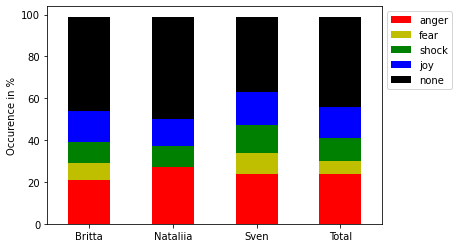

In [21]:
import numpy as np
from matplotlib import pyplot as plt

anger = (21,27,24,72/3)
fear = (8,0,10,18/3)
shock = (10,10,13,33/3)
joy =  (15,13,16,44/3)
none = (45,49,36,130/3)
index = ["Britta","Nataliia","Sven","Total"]

df = pd.DataFrame({'anger': anger,'fear': fear, 'shock': shock,'joy': joy,'none': none}, index=index)
my_colors = ['r', 'y', 'green', 'b', 'black']
bar = df.plot.bar(stacked=True, color=my_colors)
bar.legend(bbox_to_anchor=(1,1))

bar.set_ylabel("Occurence in %")
plt.xticks(range(4), index, rotation='horizontal')
plt.savefig("figure.png",bbox_inches='tight')